# TG - Data analysis

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.io as scipy
import os
import math
import statistics as st

## Define names

<div class="alert alert-block alert-info">
<b>data_path:</b> path where data is stored
    
<b>subject_name:</b> list with all subjects who participated in the experiment

<b>level:</b> list with mental workload levels (Low or L, Medium or M, High or H, Rest or R)

<b>parameters_band:</b> list with ECG chest-band parameters

<b>parameters_eye:</b> list with eye-tracker parameters

<b>block:</b> list with block number (1 or 2)
</div>

In [2]:
data_path = "C:/Users/atmiy/OneDrive/Documents/TG/Data/"
csv_path = "C:/Users/atmiy/OneDrive/Documents/TG/Code/"
subject_name = ["sujet2", "sujet4", "sujet6",
                "sujet7", "sujet8", "sujet9", 
                "sujet13", "sujet16", "sujet17", 
                "sujet20", "sujet21"]

level = ["L","M", "H", "R"]

parameters_band = ["HR", "HRV", "Posture", "BR"]

parameters_eye = ["RightEyePupilDiameter",
                  "LeftEyePupilDiameter",
                  "WeightedGazePointX",
                  "WeightedGazePointY"]

all_parameters = parameters_band + parameters_eye

block = ["1", "2"]
file_type = ["band", "eye_noprop", "eye_pupil-prop"]

## Import data

In [3]:
all_data = pd.read_csv(csv_path + "all_data" + ".csv")

In [4]:
all_data.head()

,Time,HR,HRV,Posture,BR,Block,Level,Subject,RightEyePupilDiameter,LeftEyePupilDiameter,WeightedGazePointX,WeightedGazePointY
0,35731.422,75.0,73.0,-11.0,16.3,1,R,sujet2,0.947604,4.000000,0.000000,0.000000
1,35732.422,77.0,72.0,-11.0,16.3,1,R,sujet2,0.947604,4.000000,0.000000,0.000000
2,35733.422,74.0,72.0,-11.0,16.1,1,R,sujet2,3.196250,3.555208,11.554396,-2.258922
3,35734.422,75.0,71.0,-11.0,16.1,1,R,sujet2,3.654891,3.800928,61.496514,-26.531415
4,35735.422,72.0,71.0,-11.0,16.3,1,R,sujet2,3.704074,3.733125,22.765498,7.470725


In [5]:
all_data.isnull().sum()

Time                     0
HR                       0
HRV                      0
Posture                  0
BR                       0
Block                    0
Level                    0
Subject                  0
RightEyePupilDiameter    2
LeftEyePupilDiameter     2
WeightedGazePointX       2
WeightedGazePointY       2
dtype: int64

In [6]:
e = all_data[parameters_eye].isna()
e[e['RightEyePupilDiameter'] == True]

,RightEyePupilDiameter,LeftEyePupilDiameter,WeightedGazePointX,WeightedGazePointY
960,True,True,True,True
4080,True,True,True,True


In [7]:
all_data = all_data.fillna(all_data[parameters_eye].mean())
all_data.isnull().sum()

Time                     0
HR                       0
HRV                      0
Posture                  0
BR                       0
Block                    0
Level                    0
Subject                  0
RightEyePupilDiameter    0
LeftEyePupilDiameter     0
WeightedGazePointX       0
WeightedGazePointY       0
dtype: int64

In [8]:
all_data[["Time", "HR", "HRV", "Posture", "RightEyePupilDiameter",
                "LeftEyePupilDiameter", "Level", "Block", "Subject"]].head()

,Time,HR,HRV,Posture,RightEyePupilDiameter,LeftEyePupilDiameter,Level,Block,Subject
0,35731.422,75.0,73.0,-11.0,0.947604,4.000000,R,1,sujet2
1,35732.422,77.0,72.0,-11.0,0.947604,4.000000,R,1,sujet2
2,35733.422,74.0,72.0,-11.0,3.196250,3.555208,R,1,sujet2
3,35734.422,75.0,71.0,-11.0,3.654891,3.800928,R,1,sujet2
4,35735.422,72.0,71.0,-11.0,3.704074,3.733125,R,1,sujet2


## Centering in rest

In [9]:
# oi = all_data[all_data['Subject'] == 'sujet4']
# ei = oi['Level'].apply(lambda x: -2000 if x != 'R' else 0)
# oi['BR'] = oi['BR'] + ei
# ei = oi['Level'].apply(lambda x: 8000 if x == 'R' else 0)
# oi['BR'] = oi['BR'] + ei
# oi

In [10]:
# for sub in subject_name:
#     data1 = all_data[all_data['Subject'] == sub]
#     for blk in block:
#         data2 = data1[data1['Block'] == int(blk)]
#         for par in all_parameters:
#             meanR = data2[data2['Level'] == 'R'][par].mean()
#             aux_column = data2['Level'].apply(lambda x: meanR if x != 'R' else 0)
#             all_data[par] = all_data[par] - aux_column

## Normalize data

In [11]:
def maximum_absolute_scaling(df, parameters):
    
    df_scaled = df.copy()
    
    for column in df_scaled[parameters].columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled

In [12]:
def min_max_scaling(df, parameters):
    
    df_scaled = df.copy()
    
    for column in df_scaled[parameters].columns:
        df_scaled[column] = (df_scaled[column] - df_scaled[column].min()) / (df_scaled[column].max() - df_scaled[column].min())
        
    return df_scaled

In [13]:
def z_score(df, parameters):
    
    df_std = df.copy()
    
    for column in df_std[parameters].columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

In [14]:
# Normalization by maximum absolute scale
# all_data_scaled = maximum_absolute_scaling(all_data, all_parameters)
all_data_scaled = min_max_scaling(all_data, all_parameters)
all_data_scaled[["Time", "HR", "HRV", "Posture", "RightEyePupilDiameter",
                "LeftEyePupilDiameter", "Level", "Block", "Subject"]].head()

,Time,HR,HRV,Posture,RightEyePupilDiameter,LeftEyePupilDiameter,Level,Block,Subject
0,35731.422,0.346154,0.529412,0.355556,1.209070e-16,0.695987,R,1,sujet2
1,35732.422,0.384615,0.519608,0.355556,1.209070e-16,0.695987,R,1,sujet2
2,35733.422,0.326923,0.519608,0.355556,4.897699e-01,0.602192,R,1,sujet2
3,35734.422,0.346154,0.509804,0.355556,5.896651e-01,0.654008,R,1,sujet2
4,35735.422,0.288462,0.509804,0.355556,6.003774e-01,0.639710,R,1,sujet2


## Visualize data

In [15]:
def plot_interval_block(frame, par, level, block, color):
    aux_frame = frame[frame["Level"] == level]
    aux_frame = aux_frame[aux_frame['Block'] == int(block)]
    aux_frame.index = range(len(aux_frame))
    x_min = aux_frame['Time'][0]
    x_max = aux_frame['Time'][len(aux_frame) - 1]
    
    bottom, top = plt.ylim()
    scl = abs(top - bottom)
    
    plt.axvspan(x_min, x_max, alpha=0.2, color=color)
    plt.text((x_min + x_max)/2, top - scl/20, level + block)

In [16]:
def plot_curve(frame, subj, x, y, size):
    plt.figure(figsize=size)
    plt.plot(frame[x], frame[y])
    plt.title(subj + ": " + y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.savefig('oi.png')

In [17]:
def plot_all(frame, sub, par, level, block, name):
    
    f = frame[frame['Subject'] == sub]
    f.index = range(len(f))

    plot_curve(f, sub, 'Time', par, (15,6))

    for lvl in level:
        for blk in block:
            if lvl == 'R':
                plot_interval_block(f, par, lvl, blk, 'grey')
            if lvl == 'L':
                plot_interval_block(f, par, lvl, blk, 'g')
            if lvl == 'M':
                plot_interval_block(f, par, lvl, blk, 'yellow')
            if lvl == 'H':
                plot_interval_block(f, par, lvl, blk, 'red')
    plt.show()

In [18]:
def plot_boxplot(frame, par):
    fig = plt.figure(figsize=(12,5))
    frame.boxplot()
    plt.title("Parameter: "+par)
    plt.xlabel("Subjects")
    plt.ylabel(par)
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 14}
    plt.rc('font', **font)


### Plot parameter chart

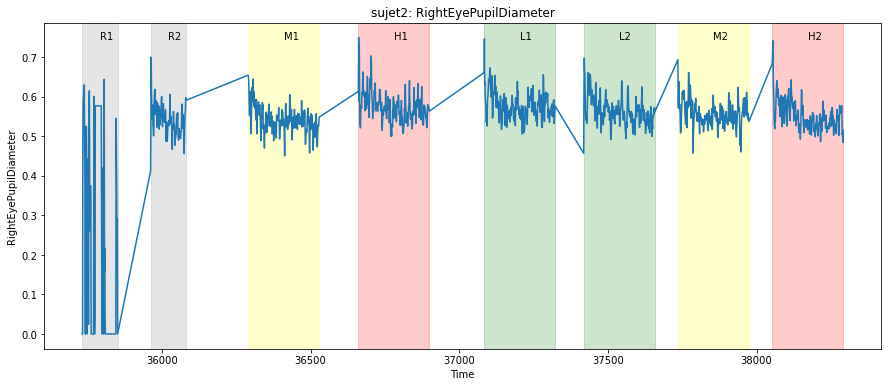

In [19]:
plot_all(all_data_scaled, 'sujet2', 'RightEyePupilDiameter', level, block, 'sujet2_Reyepupil')

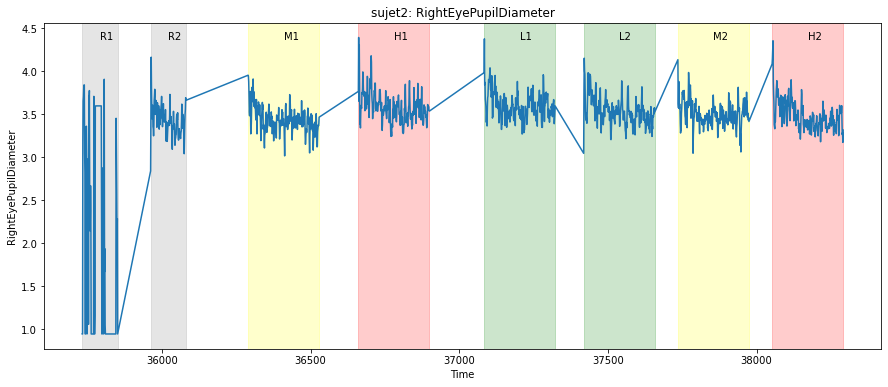

In [20]:
plot_all(all_data, 'sujet2', 'RightEyePupilDiameter', level, block, 'sujet2_Reyepupil')

### Parameters boxplot

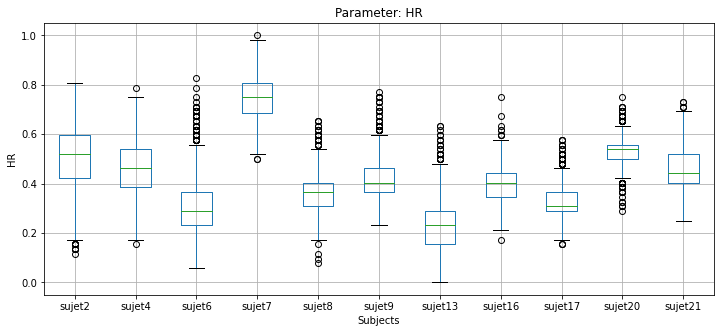

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


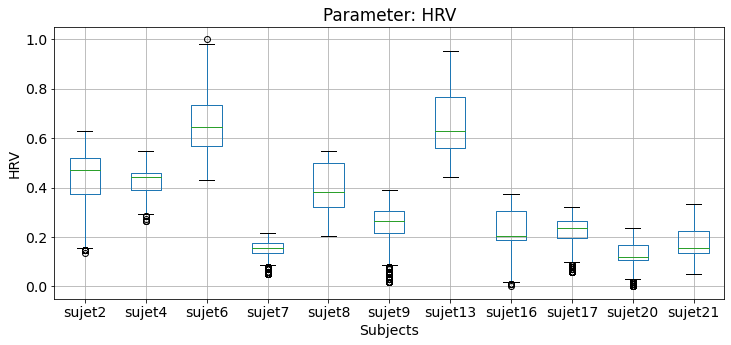

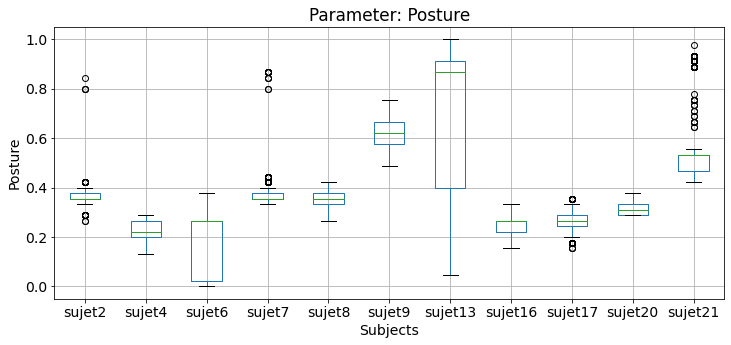

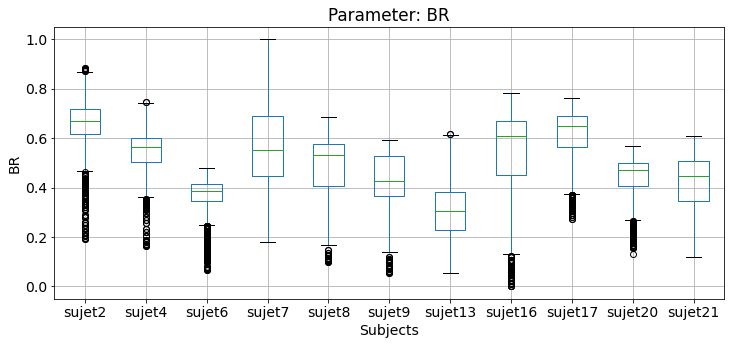

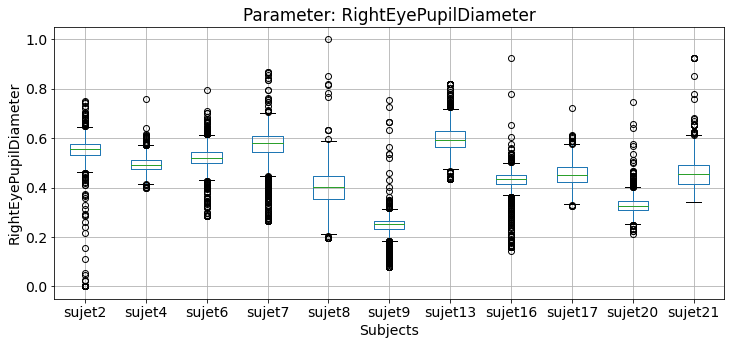

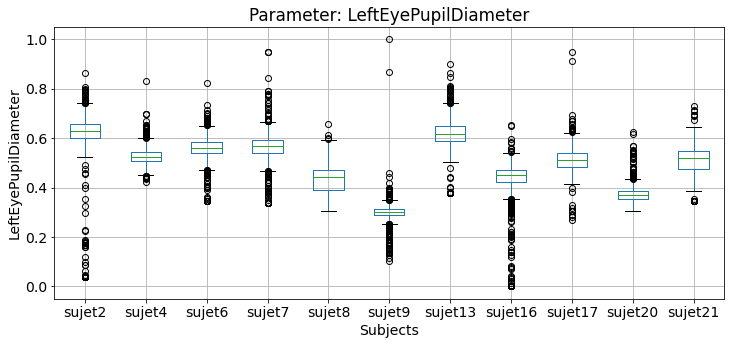

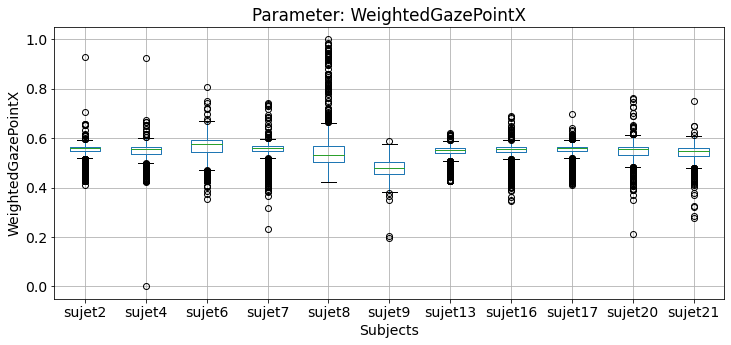

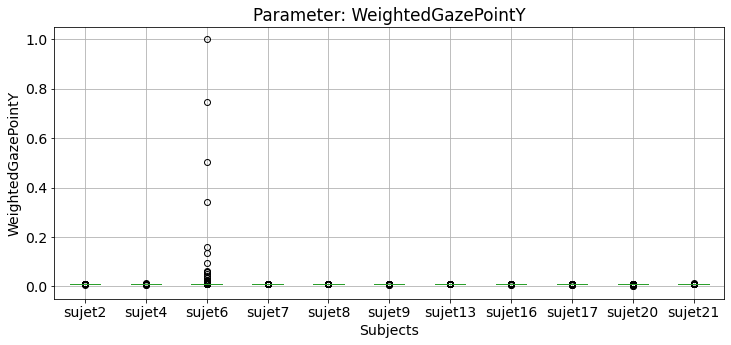

In [21]:
for par in all_parameters:
    box = {}
    for s in subject_name:
        f = all_data_scaled[all_data_scaled['Subject'] == s]
        f.index = range(len(f))
        box[s] = f[par]
    box = pd.DataFrame.from_dict(box)

    plot_boxplot(box, par)


## Machine Learning Methods application

<div class="alert alert-block alert-info">
<b>First parameters</b> set to be used: ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]

<b>Second parameters</b> set to be used: ["HR", "RightEyePupilDiameter", "LeftEyePupilDiameter"]

4 Cases to tested:

<b>Case 1:</b> first param. set and all workload levels
    
<b>Case 2:</b> second param. set and only H and L workload level

<b>Case 3:</b> first param. set and all workload level

<b>Case 4:</b> second param. set and only H and L workload level

</div>

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics as m

## KNN method

In [23]:
# data = all_data_scaled[all_data_scaled['Subject'] == 'sujet2']
# data = data[data['Level'] != "R"]
# data = data[data['Level'] != "M"]

# inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
# output = ["Level"]

# K = np.arange(1,50)

# train_acc = []
# test_acc = []

# err_train_acc = []
# err_test_acc = []
# all_acc = []

# x_train, x_test, y_train, y_test = train_test_split(data[inputs], data[output], test_size = 0.20)

# for k in K:

#     knn_model = KNeighborsClassifier(n_neighbors=k)
#     knn_model.fit(x_train, np.ravel(y_train))

#     y_pred_train = knn_model.predict(x_train)
#     y_pred_test = knn_model.predict(x_test)

#     train_accuracy = m.accuracy_score(y_train, y_pred_train)
#     test_accuracy = m.accuracy_score(y_test, y_pred_test)
    
#     train_acc.append(train_accuracy)
#     test_acc.append(test_accuracy)
#     err_train_acc.append(1 - train_accuracy)
#     err_test_acc.append(1 - test_accuracy)
    
# #     print("KNN model accuracy (training) with k = %d: %f" %(k, train_accuracy))
# #     print("KNN model accuracy (test) with k = %d: %f" %(k, test_accuracy))

# plt.plot(K, err_train_acc)
# plt.plot(K, err_test_acc)
# plt.title("Bias-Variance Tradeoff - sujet2")
# plt.xlabel("K")
# plt.ylabel("Error")
# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 14}
# plt.rc('font', **font)

# print(max(test_acc))
# print(test_acc.index(max(test_acc)))
# print(K[test_acc.index(max(test_acc))])

0.8230075757575758
0.07477368218903852


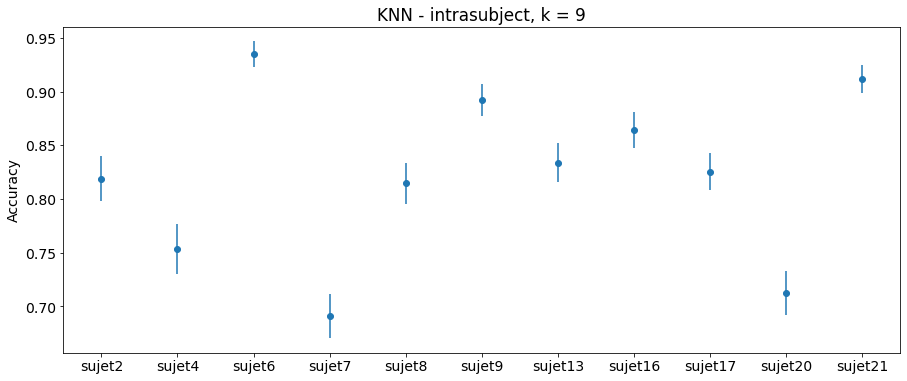

In [24]:
inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
output = ["Level"]
K = np.arange(1,100)

all_accKNN1 = []
all_stdKNN1 = []

for sub in subject_name:
    acc = []
    for i in range(100):
        
        
        data = all_data_scaled[all_data_scaled['Subject'] == sub]
        data = data[data['Level'] != "R"]
        
        x_train, x_test, y_train, y_test = train_test_split(data[inputs].values, data[output].values, test_size = 0.25)

        k = 9

        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(x_train, np.ravel(y_train))

        y_pred_train = knn_model.predict(x_train)
        y_pred_test = knn_model.predict(x_test)

        test_accuracy = m.accuracy_score(y_test, y_pred_test)

        acc.append(test_accuracy)
    
    all_accKNN1.append(st.mean(acc))
    all_stdKNN1.append(st.pstdev(acc))

plt.figure(figsize=(15,6))
plt.errorbar(subject_name, all_accKNN1, all_stdKNN1, linestyle='None', marker='o')
plt.title("KNN - intrasubject, k = 9")
plt.ylabel("Accuracy")
print(st.mean(all_accKNN1))
print(st.pstdev(all_accKNN1))

0.912844696969697
0.0677152061567981


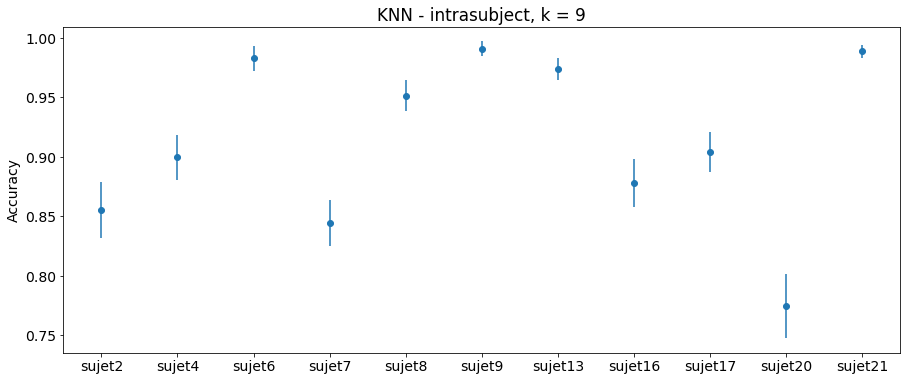

In [25]:
inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
output = ["Level"]
K = np.arange(1,100)

all_accKNN2 = []
all_stdKNN2 = []

for sub in subject_name:
    acc = []
    for i in range(100):
        
        
        data = all_data_scaled[all_data_scaled['Subject'] == sub]
        data = data[data['Level'] != "R"]
        data = data[data['Level'] != "M"]
        
        x_train, x_test, y_train, y_test = train_test_split(data[inputs].values, data[output].values, test_size = 0.25)

        k = 9

        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(x_train, np.ravel(y_train))

        y_pred_train = knn_model.predict(x_train)
        y_pred_test = knn_model.predict(x_test)

        test_accuracy = m.accuracy_score(y_test, y_pred_test)

        acc.append(test_accuracy)
    
    all_accKNN2.append(st.mean(acc))
    all_stdKNN2.append(st.pstdev(acc))

plt.figure(figsize=(15,6))
plt.errorbar(subject_name, all_accKNN2, all_stdKNN2, linestyle='None', marker='o')
plt.title("KNN - intrasubject, k = 9")
plt.ylabel("Accuracy")
print(st.mean(all_accKNN2))
print(st.pstdev(all_accKNN2))

### Intersubject classifier

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
0.8311237373737373
4
5


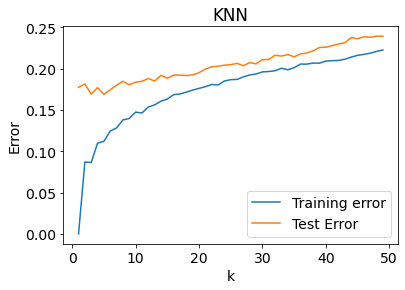

In [26]:
inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
output = ["Level"]

data = all_data_scaled
data = data[data['Level'] != "R"]

inter_train_x, inter_test_x, inter_train_y, inter_test_y = train_test_split(
    data[inputs], data[output].values, test_size = 0.20)

all_train = []
all_test = []

K = np.arange(1,50)

for k in K:

    knn_model_2 = KNeighborsClassifier(n_neighbors=k)
    knn_model_2.fit(inter_train_x, np.ravel(inter_train_y))
    np.ravel(inter_train_y)
    y_pred_1 = knn_model_2.predict(inter_train_x)
    y_pred_2 = knn_model_2.predict(inter_test_x)
    
    all_train.append(1 - m.accuracy_score(inter_train_y, y_pred_1))
    all_test.append(1 - m.accuracy_score(inter_test_y, y_pred_2))

print(K)
plt.plot(K, all_train)
plt.plot(K, all_test)
plt.xlabel("k")
plt.ylabel("Error")
plt.title("KNN")
plt.legend(["Training error", "Test Error"])

print(1 - min(all_test))
print(all_test.index(min(all_test)))
print(K[all_test.index(min(all_test))])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
0.9176136363636364
0
1


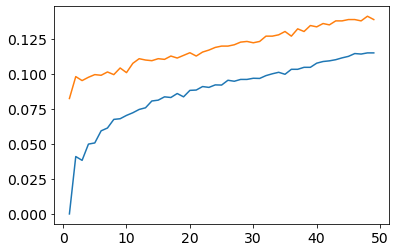

In [27]:
inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
# inputs = ["HR", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
output = ["Level"]

data = all_data_scaled
data = data[data['Level'] != "R"]
data = data[data['Level'] != "M"]


inter_train_x, inter_test_x, inter_train_y, inter_test_y = train_test_split(
    data[inputs], data[output].values, test_size = 0.20)

all_train = []
all_test = []

K = np.arange(1,50)

for k in K:

    knn_model_2 = KNeighborsClassifier(n_neighbors=k)
    knn_model_2.fit(inter_train_x, np.ravel(inter_train_y))
    np.ravel(inter_train_y)
    y_pred_1 = knn_model_2.predict(inter_train_x)
    y_pred_2 = knn_model_2.predict(inter_test_x)
    
    all_train.append(1 - m.accuracy_score(inter_train_y, y_pred_1))
    all_test.append(1 - m.accuracy_score(inter_test_y, y_pred_2))

print(K)
plt.plot(K, all_train)
plt.plot(K, all_test)

print(1 - min(all_test))
print(all_test.index(min(all_test)))
print(K[all_test.index(min(all_test))])

## SVM method

In [28]:
from sklearn.svm import SVC

0.6197247474747475
0.09897701105290892


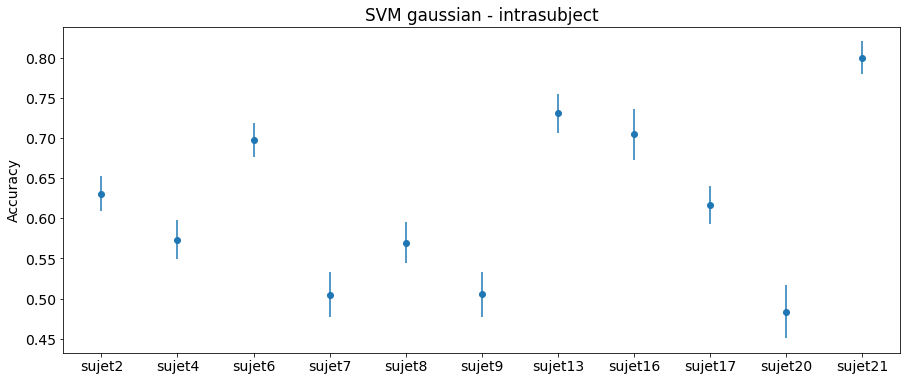

In [29]:
inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
output = ["Level"]

all_accSVM1 = []
all_stdSVM1 = []

for sub in subject_name:
    acc = []
    for i in range(100):
        
        data = all_data_scaled[all_data_scaled['Subject'] == sub]
        data = data[data['Level'] != "R"]
        
        x_train, x_test, y_train, y_test = train_test_split(data[inputs].values, data[output].values, test_size = 0.25)

        linear = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
        linear.fit(x_train, np.ravel(y_train))

        y_pred_train = linear.predict(x_train)
        y_pred_test = linear.predict(x_test)

        test_accuracy = m.accuracy_score(y_test, y_pred_test)

        acc.append(test_accuracy)
    
    all_accSVM1.append(st.mean(acc))
    all_stdSVM1.append(st.pstdev(acc))

plt.figure(figsize=(15,6))
plt.errorbar(subject_name, all_accSVM1, all_stdSVM1, linestyle='None', marker='o')
plt.title("SVM gaussian - intrasubject")
plt.ylabel("Accuracy")
print(st.mean(all_accSVM1))
print(st.pstdev(all_accSVM1))

0.8126325757575757
0.11424135720102922


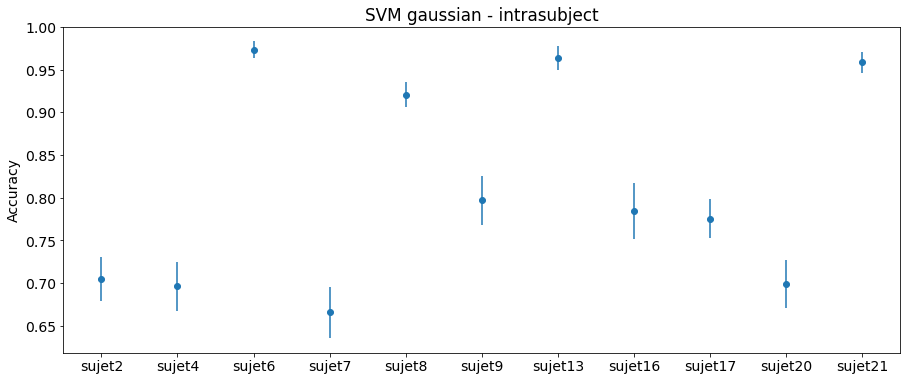

In [30]:
inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
output = ["Level"]

all_accSVM2 = []
all_stdSVM2 = []

for sub in subject_name:
    acc = []
    for i in range(100):
        
        data = all_data_scaled[all_data_scaled['Subject'] == sub]
        data = data[data['Level'] != "R"]
        data = data[data['Level'] != "M"]
        
        x_train, x_test, y_train, y_test = train_test_split(data[inputs].values, data[output].values, test_size = 0.25)

        linear = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
        linear.fit(x_train, np.ravel(y_train))

        y_pred_train = linear.predict(x_train)
        y_pred_test = linear.predict(x_test)

        test_accuracy = m.accuracy_score(y_test, y_pred_test)

        acc.append(test_accuracy)
    
    all_accSVM2.append(st.mean(acc))
    all_stdSVM2.append(st.pstdev(acc))

plt.figure(figsize=(15,6))
plt.errorbar(subject_name, all_accSVM2, all_stdSVM2, linestyle='None', marker='o')
plt.title("SVM gaussian - intrasubject")
plt.ylabel("Accuracy")
print(st.mean(all_accSVM2))
print(st.pstdev(all_accSVM2))

In [31]:
inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
output = ["Level"]

data = all_data_scaled

inter_train_x, inter_test_x, inter_train_y, inter_test_y = train_test_split(
    data[inputs], data[output].values, test_size = 0.20)

all_train = []
all_test = []

# svm = SVC(kernel='linear', C=1, decision_function_shape='ovo')
svm = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
svm.fit(inter_train_x, np.ravel(inter_train_y))

y_pred_1 = svm.predict(inter_train_x)
y_pred_2 = svm.predict(inter_test_x)
    
print('Train:', m.accuracy_score(inter_train_y, y_pred_1))
print('Test:', m.accuracy_score(inter_test_y, y_pred_2))

Train: 0.445413961038961
Test: 0.42992424242424243


In [32]:
inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
output = ["Level"]

data = all_data_scaled
data = data[data['Level'] != "R"]
data = data[data['Level'] != "M"]


inter_train_x, inter_test_x, inter_train_y, inter_test_y = train_test_split(
    data[inputs], data[output].values, test_size = 0.20)

all_train = []
all_test = []

# svm = SVC(kernel='linear', C=1, decision_function_shape='ovo')
svm = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
svm.fit(inter_train_x, np.ravel(inter_train_y))

y_pred_1 = svm.predict(inter_train_x)
y_pred_2 = svm.predict(inter_test_x)
    
print('Train:', m.accuracy_score(inter_train_y, y_pred_1))
print('Test:', m.accuracy_score(inter_test_y, y_pred_2))

Train: 0.6519886363636364
Test: 0.6302083333333334


## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier


0.859550505050505
0.06689416656141957


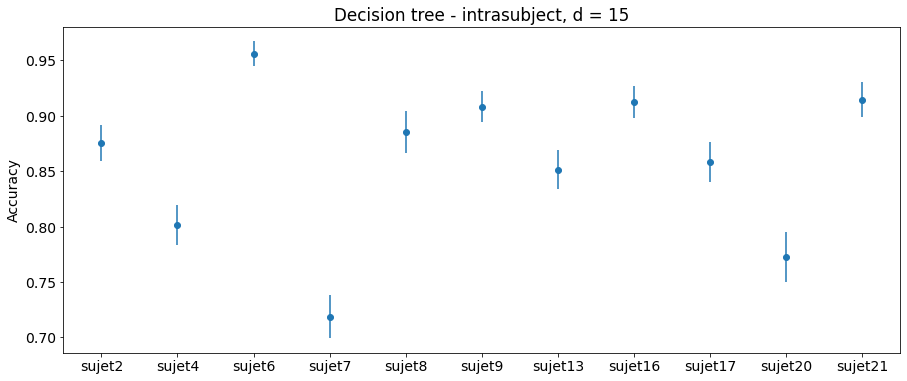

In [34]:
inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
output = ["Level"]

all_accDT1 = []
all_stdDT1 = []

for sub in subject_name:
    acc = []
    for i in range(100):
        
        data = all_data_scaled[all_data_scaled['Subject'] == sub]
        data = data[data['Level'] != "R"]
        
        x_train, x_test, y_train, y_test = train_test_split(data[inputs].values, data[output].values, test_size = 0.25)

        tree = DecisionTreeClassifier(max_depth = 15)
        tree.fit(x_train, np.ravel(y_train))

        y_pred_train = tree.predict(x_train)
        y_pred_test = tree.predict(x_test)

        test_accuracy = m.accuracy_score(y_test, y_pred_test)

        acc.append(test_accuracy)
    
    all_accDT1.append(st.mean(acc))
    all_stdDT1.append(st.pstdev(acc))

plt.figure(figsize=(15,6))
plt.errorbar(subject_name, all_accDT1, all_stdDT1, linestyle='None', marker='o')
plt.title("Decision tree - intrasubject, d = 15")
plt.ylabel("Accuracy")
print(st.mean(all_accDT1))
print(st.pstdev(all_accDT1))


0.9317575757575758
0.05654755423161636


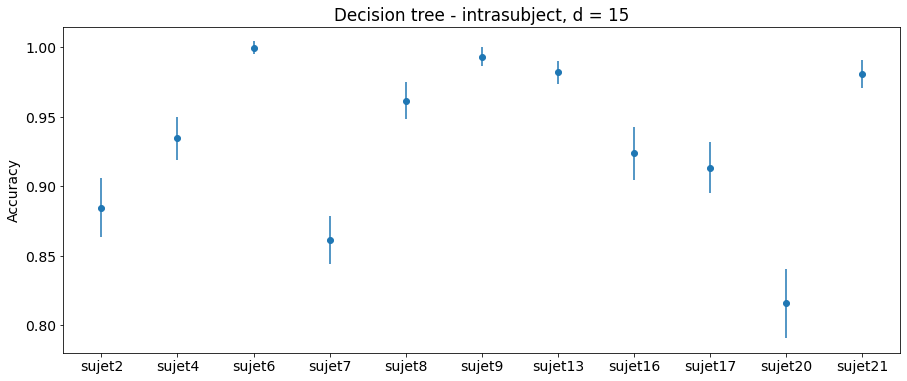

In [35]:
inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
output = ["Level"]

all_accDT2 = []
all_stdDT2 = []

for sub in subject_name:
    acc = []
    for i in range(100):
        
        data = all_data_scaled[all_data_scaled['Subject'] == sub]
        data = data[data['Level'] != "R"]
        data = data[data['Level'] != "M"]
        
        x_train, x_test, y_train, y_test = train_test_split(data[inputs].values, data[output].values, test_size = 0.25)

        tree1 = DecisionTreeClassifier(max_depth = 15)
        tree1.fit(x_train, np.ravel(y_train))

        y_pred_train = tree1.predict(x_train)
        y_pred_test = tree1.predict(x_test)

        test_accuracy = m.accuracy_score(y_test, y_pred_test)

        acc.append(test_accuracy)
    
    all_accDT2.append(st.mean(acc))
    all_stdDT2.append(st.pstdev(acc))

plt.figure(figsize=(15,6))
plt.errorbar(subject_name, all_accDT2, all_stdDT2, linestyle='None', marker='o')
plt.title("Decision tree - intrasubject, d = 15")
plt.ylabel("Accuracy")
print(st.mean(all_accDT2))
print(st.pstdev(all_accDT2))


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
0.8488005050505051
19
d =  20


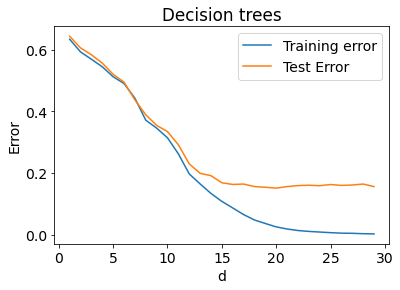

In [36]:
inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
output = ["Level"]

data = all_data_scaled
data = data[data['Level'] != "R"]

inter_train_x, inter_test_x, inter_train_y, inter_test_y = train_test_split(
    data[inputs], data[output].values, test_size = 0.20)

all_train = []
all_test = []

D = np.arange(1,30)

for d in D:

    tree = DecisionTreeClassifier(max_depth = d)
    tree.fit(inter_train_x, np.ravel(inter_train_y))
    np.ravel(inter_train_y)
    y_pred_1 = tree.predict(inter_train_x)
    y_pred_2 = tree.predict(inter_test_x)
    
    all_train.append(1 - m.accuracy_score(inter_train_y, y_pred_1))
    all_test.append(1 - m.accuracy_score(inter_test_y, y_pred_2))

print(D)
plt.plot(D, all_train)
plt.plot(D, all_test)
plt.xlabel("d")
plt.ylabel("Error")
plt.title("Decision trees")
plt.legend(["Training error", "Test Error"])

print(1 - min(all_test))
print(all_test.index(min(all_test)))
print("d = ", D[all_test.index(min(all_test))])

In [37]:
import sklearn
print(sklearn.__version__)

0.23.2


In [38]:
from sklearn.tree import plot_tree

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


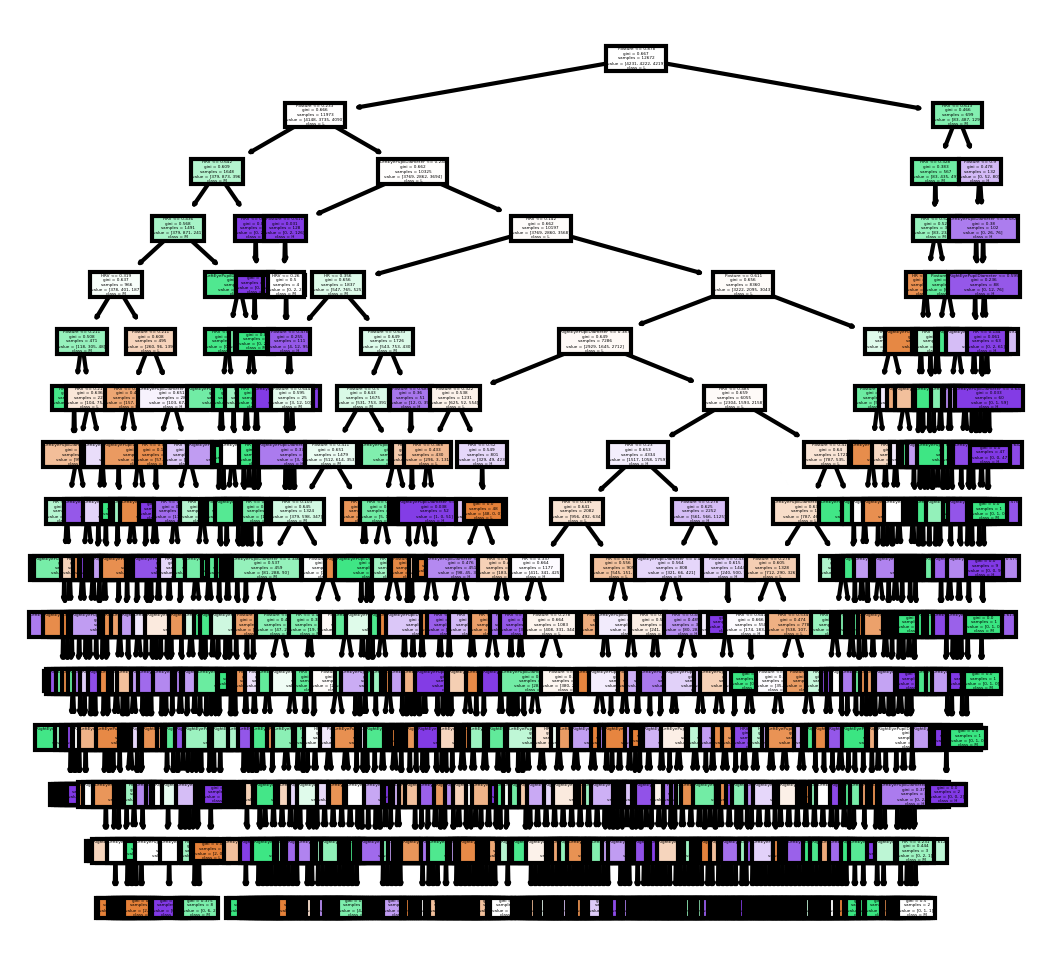

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
cn=['L', 'M', 'H']

clf = DecisionTreeClassifier(max_depth = 15)
dt = clf.fit(inter_train_x, np.ravel(inter_train_y))
plot_tree(clf,
          feature_names = inputs, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
0.921875
21
d =  22


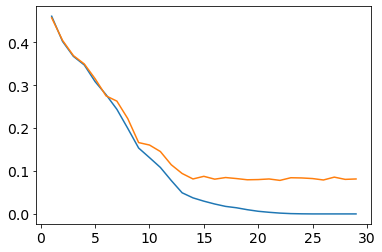

In [40]:
inputs = ["HR", "HRV", "RightEyePupilDiameter", "LeftEyePupilDiameter", "Posture"]
output = ["Level"]

data = all_data_scaled
data = data[data['Level'] != "R"]
data = data[data['Level'] != "M"]


inter_train_x, inter_test_x, inter_train_y, inter_test_y = train_test_split(
    data[inputs], data[output].values, test_size = 0.20)

all_train = []
all_test = []

D = np.arange(1,30)

for d in D:

    tree = DecisionTreeClassifier(max_depth = d)
    tree.fit(inter_train_x, np.ravel(inter_train_y))
    np.ravel(inter_train_y)
    y_pred_1 = tree.predict(inter_train_x)
    y_pred_2 = tree.predict(inter_test_x)
    
    all_train.append(1 - m.accuracy_score(inter_train_y, y_pred_1))
    all_test.append(1 - m.accuracy_score(inter_test_y, y_pred_2))

print(D)
plt.plot(D, all_train)
plt.plot(D, all_test)

print(1 - min(all_test))
print(all_test.index(min(all_test)))
print("d = ", D[all_test.index(min(all_test))])

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


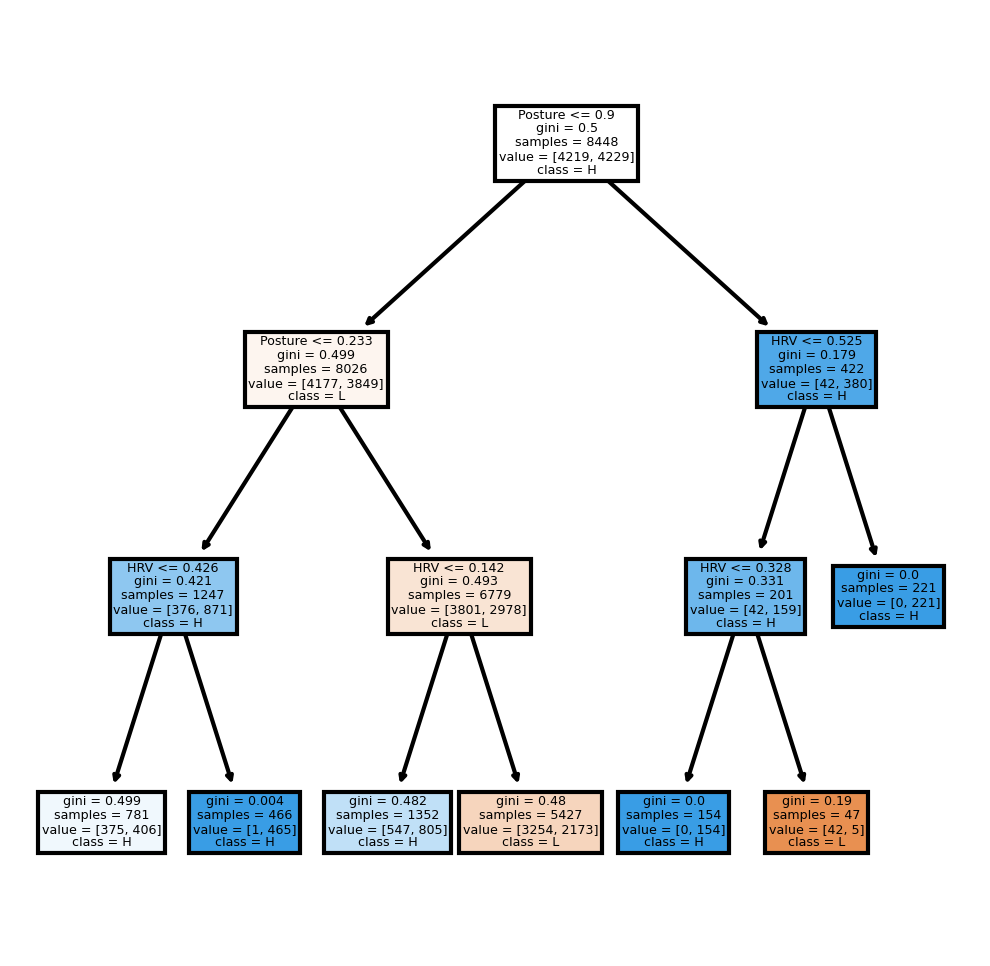

In [41]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
cn=['L', 'H']

clf = DecisionTreeClassifier(max_depth = 3)
dt = clf.fit(inter_train_x, np.ravel(inter_train_y))
plot_tree(clf,
          feature_names = inputs, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [42]:
tree3 = DecisionTreeClassifier(max_depth = 5)
tree3.fit(inter_train_x, np.ravel(inter_train_y))
np.ravel(inter_train_y)
y_pred_1 = tree3.predict(inter_train_x)
y_pred_2 = tree3.predict(inter_test_x)
    
print(m.accuracy_score(inter_train_y, y_pred_1))
print(m.accuracy_score(inter_test_y, y_pred_2))

0.6918797348484849
0.6851325757575758


# Geral

In [43]:
subject_name1 = subject_name + ["mean"]

all_accKNN1 = all_accKNN1 + [st.mean(all_accKNN1)]
all_stdKNN1 = all_stdKNN1 + [st.pstdev(all_accKNN1)]
all_accKNN2 = all_accKNN2 + [st.mean(all_accKNN2)]
all_stdKNN2 = all_stdKNN2 + [st.pstdev(all_accKNN2)]

all_accSVM1 = all_accSVM1 + [st.mean(all_accSVM1)]
all_stdSVM1 = all_stdSVM1 + [st.pstdev(all_accSVM1)]
all_accSVM2 = all_accSVM2 + [st.mean(all_accSVM2)]
all_stdSVM2 = all_stdSVM2 + [st.pstdev(all_accSVM2)]

all_accDT1 = all_accDT1 + [st.mean(all_accDT1)]
all_stdDT1 = all_stdDT1 + [st.pstdev(all_accDT1)]
all_accDT2 = all_accDT2 + [st.mean(all_accDT2)]
all_stdDT2 = all_stdDT2 + [st.pstdev(all_accDT2)]



In [44]:
subj_name2 = ["S2", "S4", "S6",
                "S7", "S8", "S9", 
                "S13", "S16", "S17", 
                "S20", "S21", "Mean"]

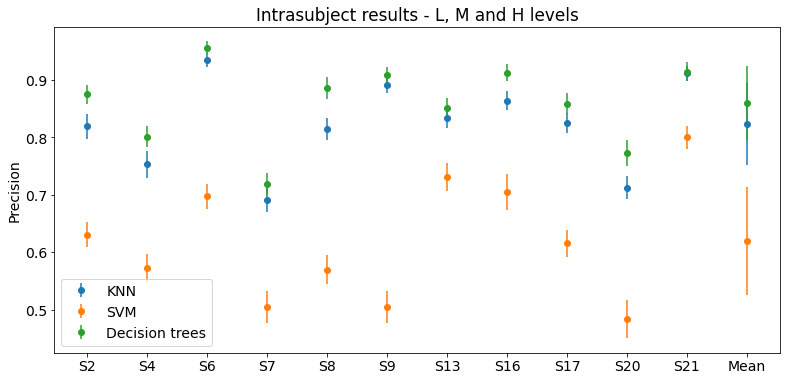

In [45]:

plt.figure(figsize=(13,6))
plt.errorbar(subj_name2, all_accKNN1, all_stdKNN1, linestyle='None', marker='o', label = "KNN", )
plt.errorbar(subj_name2, all_accSVM1, all_stdSVM1, linestyle='None', marker='o', label = "SVM")
plt.errorbar(subj_name2, all_accDT1, all_stdDT1, linestyle='None', marker='o', label = "Decision trees")
plt.title("Intrasubject results - L, M and H levels")
plt.ylabel("Precision")
plt.legend()

In [46]:
i = 11
print(subj_name2[i])
print("----------- KNN -----------")
print("%.3f"%all_accKNN1[i])
print("%.3f"%all_stdKNN1[i])
print("----------- SVM -----------")
print("%.3f"%all_accSVM1[i])
print("%.3f"%all_stdSVM1[i])
print("----------- DT  -----------")
print("%.3f"%all_accDT1[i])
print("%.3f"%all_stdDT1[i])
print("-----------")


Mean
----------- KNN -----------
0.823
0.072
----------- SVM -----------
0.620
0.095
----------- DT  -----------
0.860
0.064
-----------


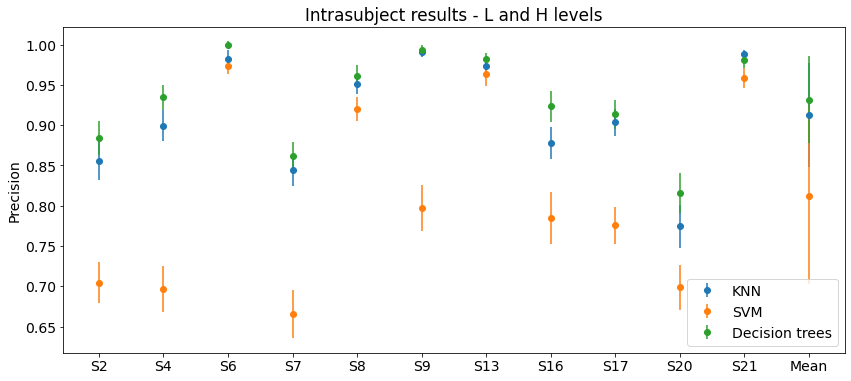

In [47]:
plt.figure(figsize=(14,6))
plt.errorbar(subj_name2, all_accKNN2, all_stdKNN2, linestyle='None', marker='o', label = "KNN")
plt.errorbar(subj_name2, all_accSVM2, all_stdSVM2, linestyle='None', marker='o', label = "SVM")
plt.errorbar(subj_name2, all_accDT2, all_stdDT2, linestyle='None', marker='o', label = "Decision trees")
plt.title("Intrasubject results - L and H levels")
plt.ylabel("Precision")
plt.legend()

In [48]:
i = 11
print(subj_name2[i])
print("----------- KNN -----------")
print("%.1f"%((all_accKNN2[i])*100))
print("%.1f"%((all_stdKNN2[i])*100))
print("----------- SVM -----------")
print("%.1f"%((all_accSVM2[i])*100))
print("%.1f"%((all_stdSVM2[i])*100))
print("----------- DT  -----------")
print("%.1f"%((all_accDT2[i])*100))
print("%.1f"%((all_stdDT2[i])*100))
print("-----------")


Mean
----------- KNN -----------
91.3
6.5
----------- SVM -----------
81.3
10.9
----------- DT  -----------
93.2
5.4
-----------
